In [2]:
import numpy as np
import pandas as pd

1. Background variables
2. Health
3. Religion and Ethnicity
3. Social Integration and Leisure
4. Family and Household
5. Work and Schooling
6. Personality
7. Values
8. Economic Situation: Assets
9. Economic Situation: Income
10. Economic Situation: Housing

In [3]:
bgvar_22 = pd.read_csv('avars_202201_EN_1.0p.csv', sep=';')
hea_22 = pd.read_stata('ch22o_EN_1.0p.dta') # Maja
rel_22 = pd.read_stata('cr22o_EN_1.0p.dta') # Tyna
soc_22 = pd.read_stata('cs22o_EN_1.1p.dta') # Tyna
fam_22 = pd.read_stata('cf22o_EN_1.0p.dta') # Tyna
wor_22 = pd.read_stata('cw22o_EN_1.0p.dta') # Tyna
per_22 = pd.read_stata('cp22n_EN_1.0p.dta') # Maja
val_22 = pd.read_stata('cv22n_EN_1.0p.dta') # Maja
ass_22 = pd.read_stata('ca22h_EN_1.0p.dta') # Mate
inc_22 = pd.read_stata('ci22o_EN_1.0p.dta') # Mate
hou_22 = pd.read_stata('cd22o_EN_1.0p.dta') # Mate

In [4]:
#column combinators (replaces given columns with one containing their avg values)
def average_columns(df, *columns):
    new_column_name = columns[-1]
    
    try:
        selected_columns = list(columns[:-1])
        avg_col = df[selected_columns].astype(float).mean(axis=1)
        return pd.DataFrame({new_column_name: avg_col})
    except KeyError as e:
        print(f'KeyError: {e} not found in DataFrame columns.')
        return pd.DataFrame({new_column_name: np.nan})

#replaces given columns with one containing their sums (not working ;-())
def sum_columns(df, new_column, *columns):
    df[new_column] = df[columns].sum(axis=1)

Background variables:

1. geslacht to sex
2. leeftijd to age
3. lftdcat to age_cat
4. aantalhh to hhm_num
5. aantalki to hh_chi
6. burgstat to civ_sta
7. woning to dwe_typ
8. sted to urb_lvl (Urban character: Surrounding address density per km2 extremely urban 2,500 or more very 1,500 to 2,500 moderately 1,000 to 1,500 slightly 500 to 1,000 not less than 500) 
9. belbezig to pri_occ 
10. brutoink to mon_inc 
11. brutocat mon_inc_cat 12. brutohh_f to hh_inc 
13. oplzon to edu_lvl

In [5]:
bgvar_22[bgvar_22.select_dtypes(include='category').columns] = bgvar_22[bgvar_22.select_dtypes(include='category').columns].apply(lambda col: col.astype('category').cat.codes)
bg_var_names = {'nomem_encr':'nomem_encr', 'geslacht':'sex','leeftijd':'age', 'lftdcat':'age_cat', 'aantalhh':'hhm_num', 'aantalki':'hh_chi', 'burgstat':'civ_sta', 'woning':'dwe_typ', 'sted':'urb_lvl',  'belbezig':'pri_occ', 'brutoink':'mon_inc', 'brutocat':'mon_inc_cat','brutohh_f':'hh_inc', 'oplzon':'edu_lvl'}
bg_var = bgvar_22.loc[:, list(bg_var_names.keys())].rename(columns=bg_var_names)
bg_var['hh_inc'] = pd.to_numeric(bg_var['hh_inc'].str.replace(',', '.'), errors='coerce')

Concepts in Health:
1. **Subjective health** (ch22o004 to sub_hea)
2. **Relative health** (ch22o005 to rel_hea)
3. Life expectancy
4. **Mental health** (all neg as men_hea_neg and and all pos as men_hea_pos)
5. Height, weight
6. **Chronical problems** (ch22o018 to disability)
7. Health problems
8. Impediment in labour
9. **Substance use** (ch22o126 to smoker, ch22o133 to alcohol, all substances to subs)
10. Medication
11. Physical activity - only until 2018
12. Health improving behaviour - - only until 2018
13. Use of healthcare
14. Sight and hearing
15. Health insurance

In [6]:
#select categorical columns and convert to numeric
hea_22[hea_22.select_dtypes(include='category').columns] = hea_22[hea_22.select_dtypes(include='category').columns].apply(lambda col: col.astype('category').cat.codes)

#average for mental health and drugs
hea_toavg = [('ch22o011','ch22o014','ch22o012', 'men_hea_neg'),('ch22o013', 'ch22o015', 'men_hea_pos'), ('ch22o159', 'ch22o160', 'ch22o161', 'ch22o161', 'ch22o162', 'ch22o163', 'ch22o270', 'subs')]
hea_22 = pd.concat([hea_22] + [average_columns(hea_22, *column_set) for column_set in hea_toavg], axis=1)

#create a new df hea_22_con with selected columnns and new columns containing avgs (representing concepts)
hea_con = {'nomem_encr':'nomem_encr', 'ch22o004': 'sub_hea', 'ch22o005': 'rel_hea', 'ch22o018': 'disability', 'ch22o020':'mob_issues', 'ch22o126':'smoker', 'ch22o133':'alcohol', 'men_hea_neg':'men_hea_neg', 'men_hea_pos':'men_hea_pos', 'subs':'subs'}
hea_22_con = hea_22.loc[:, list(hea_con.keys())].rename(columns=hea_con)

#hea_22_con.head()

Concepts in Religion and Ethnicity:

1. **Religious upbringing** (cr23p135 to rel_upb)
2. **Religious affiliation** (cr23p144 to rel_aff)
3. **Religiosity** (cr23p162 to relig)
4. Religious orthodoxy
5. Nationality 
6. **Origin** (cr23p079 – cr23p087 to lang_ori, cr23p079 indicating Dutch or not)
7. **Ethnic identification** (cr23p164 to eth_id)
8. Language proficiency and use

In [7]:
rel_con = {'nomem_encr':'nomem_encr','cr22o135':'rel_upb', 'cr22o144':'rel_aff', 'cr22o162':'relig', 'cr22o079':'lang_ori', 'cr22o164':'eth_id'}
rel_22[rel_22.select_dtypes(include='category').columns] = rel_22[rel_22.select_dtypes(include='category').columns].apply(lambda col: col.astype('category').cat.codes)
rel_22_con = rel_22.loc[:, list(rel_con.keys())].rename(columns=rel_con)
#rel_22_con.head()

Concepts in Social Intergation and Leisure:

1. Loneliness
2. Social contacts 
3. **Satisfaction leisure** (cs22o001 to lei_sat)
4. Social engagement
5. Volunteer aid
6. Time expenditure voluntary work
7. **Cultural participation** (sum cs22o494 - cs22o496 to cul_par)
8. **Holidays** (cs22o103 to ab_hol)
9. **Sport** (cs22o105 to spo_h)
10. Media usage

In [8]:
soc_22[soc_22.select_dtypes(include='category').columns] = soc_22[soc_22.select_dtypes(include='category').columns].apply(lambda col: col.astype('category').cat.codes)
cultosum = ['cs22o494', 'cs22o495', 'cs22o517', 'cs22o093', 'cs22o094', 'cs22o568', 'cs22o516', 'cs22o496']
soc_22['cul_sum'] = soc_22[cultosum].sum(axis=1)
soc_con = {'nomem_encr':'nomem_encr','cs22o001':'lei_sat', 'cul_sum':'cul_par', 'cs22o103':'ab_hol', 'cs22o105':'spo_h'}
soc_22_con = soc_22.loc[:, list(soc_con.keys())].rename(columns=soc_con)
#soc_22_con.head()

/var/folders/bs/z96739d14kv16wpypz0ww9b40000gn/T/ipykernel_65341/2150667875.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  soc_22['cul_sum'] = soc_22[cultosum].sum(axis=1)


Concepts in Family and Household:

1. **Parental relations** (cf22o145+cf22o146 to par_int)
2. **Partnership** (cf22o025 to liv_tog)
3. Marriage
4. Marital history
5. **Children** (cf22o455 to chi_num, cf22o456 to chi1_bir)
6. **Partnership and childbirth intentions** (cf22o128 to chi_fut)
7. Infertility
8. Parental support
9. Parent support
10. Quality of relationship
11. Division of domestic tasks
12. Perceived burden domestic tasks
13. Perceived burden child care
14. Perceived fairness division tasks
15. Child education: Supervision
16. Childcare

In [9]:
fam_22[fam_22.select_dtypes(include='category').columns] = fam_22[fam_22.select_dtypes(include='category').columns].apply(lambda col: col.astype('category').cat.codes)
famtosum = ['cf22o143', 'cf22o144']
fam_22['fam_sum'] = fam_22[famtosum].sum(axis=1)
fam_con = {'nomem_encr':'nomem_encr', 'fam_sum':'par_int', 'cf22o025':'liv_tog', 'cf22o455':'chi_num', 'cf22o456':'chi1_bir', 'cf22o128':'chi_fut'}
fam_22_con = fam_22.loc[:, list(fam_con.keys())].rename(columns=fam_con)
#fam_22_con.head()

/var/folders/bs/z96739d14kv16wpypz0ww9b40000gn/T/ipykernel_65341/1577856911.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fam_22['fam_sum'] = fam_22[famtosum].sum(axis=1)


Concepts in Work and Schooling:

1. Employment / activity status
2. Hours of paid work
3. **Characteristics current or last job** (cw22o136 to wor_min, cw22o140 to wor_nig, cw22o142 to wor_hom, cw22o402 to wor_sect)
4. Average pay job
5. Second jobs
6. Work aspirations
7. **Satisfaction** (cw22o128 to inc_sat)
8. Employment conditions
9. Commuting
10. Pensions
11. Non-working, non-pension
12. Job search
13. Satisfaction education
14. Highest qualification
15. Highest education
16. Qualifications for job
17. Education and training in last year

cw22o439 to chi_<8

In [10]:
wor_22[wor_22.select_dtypes(include='category').columns] = wor_22[wor_22.select_dtypes(include='category').columns].apply(lambda col: col.astype('category').cat.codes)
wor_con = {'nomem_encr':'nomem_encr', 'cw22o136':'wor_min', 'cw22o140':'wor_nig', 'cw22o142':'wor_hom', 'cw22o402':'wor_sect', 'cw22o128':'inc_sat', 'cw22o439':'chi_<8'}
wor_22_con = wor_22.loc[:, list(wor_con.keys())].rename(columns=wor_con)
#wor_22_con.head()

Concepts in Personality:
1. Happiness
2. **Life satisfaction** (cp22n014-016 to life_satf, cp22n070-079 as self_est_pos or self_est_neg)
3. Big five personality
4. Survey attitude
5. Self esteem
6. Mood
7. Need to evaluate
8. **Value orientation** (cp22n100 to res, cp22n110 to ind, cp22n118 to fam_sec, cp22n119 to free, cp22n129 to comf_life, cp22n133 to soc_rec)
9. Inclusion of Others in the Self
10. Social desirability
11. Affects
12. Need for Cognition
13. **Social trust** (cp22n019 to trust )

In [11]:
per_22[per_22.select_dtypes(include='category').columns] = per_22[per_22.select_dtypes(include='category').columns].apply(lambda col: col.astype('category').cat.codes)

#averages for life satisfaction and self-esteem
per_toavg = [('cp22n014','cp22n015','cp22n016', 'cp22n017', 'cp22n018','life_satf'),('cp22n070', 'cp22n071', 'cp22n073', 'cp22n075', 'cp22n076', 'self_est_pos'), ('cp22n072', 'cp22n074', 'cp22n078', 'cp22n079', 'self_est_neg')]
per_22 = pd.concat([per_22] + [average_columns(per_22, *column_set) for column_set in per_toavg], axis=1)

#create a new df per_22_con with selected columnns and new columns containing avgs (representing concepts)
per_con = {'nomem_encr':'nomem_encr','cp22n100': 'resp', 'cp22n110': 'ind','cp22n118': 'fam_sec','cp22n119': 'free', 'cp22n133': 'soc_rec', 'cp22n129': 'comf_life', 'cp22n019': 'trust', 'life_satf':'life_satf', 'self_est_pos':'self_est_pos', 'self_est_neg':'self_est_neg' }
per_22_con = per_22.loc[:, list(per_con.keys())].rename(columns=per_con)

#per_22_con.head()

Concepts in Values:
1. Beliefs about maternal employment
2. **Gender role attitudes** (cv22n113 to gend_roles)
3. Political position ethnic minorities *page not working*
4. Right wing attitudes *page not working*
5. **Attitude towards foreigners** (cv22n120 to nationalist)
6. Marriage attitudes
7. Family solidarity
8. Norm of having children
9. Work ethic
10. Conservatism
11. Economic conservatism

In [12]:
val_22[val_22.select_dtypes(include='category').columns] = val_22[val_22.select_dtypes(include='category').columns].apply(lambda col: col.astype('category').cat.codes)

#create a new df val_22_con with selected columnns and new columns containing avgs (representing concepts)
val_con = {'nomem_encr':'nomem_encr','cv22n113': 'gend_roles', 'cv22n120': 'nationalist'}
val_22_con = val_22.loc[:, list(val_con.keys())].rename(columns=val_con)

#val_22_con.head()

Concepts in Economic Situtation: Assets:
1. **Assets** (ca22h008 to ass_own, ca22h023 to ass_val, ca22h012 to tot_bal)

In [13]:
#mapping dictionary for asset value
mean_mapping = {
    -1: None,
    0: 250,
    1: 1000,
    2: 2000,
    3: 3750,
    4: 6250,
    5: 8750,
    6: 11000,
    7: 13500,
    8: 17500,
    9: 22500,
    10: 37500,
    11: 62500,
    12: 87500,
    13: 100000,
    14: None,
}

ass_22['ca22h023'] = ass_22['ca22h023'].replace("I don't know", np.nan).combine_first(ass_22['ca22h024'].map(mean_mapping))

In [14]:
#mapping dictionary for total balance
mean_mapping = {
    -1: None,
    0: 25,
    1: 150,
    2: 375,
    3: 625,
    4: 875,
    5: 1750,
    6: 3725,
    7: 6250,
    8: 10750,
    9: 12750,
    10: 15500,
    11: 18500,
    12: 22500,
    13: 25000,
    14: None,
}

#for don't know
ass_22['ca22h012'] = ass_22['ca22h012'].replace(-9999999999, np.nan).combine_first(ass_22['ca22h023'].map(mean_mapping))
#for prefer not to say
ass_22['ca22h012'] = ass_22['ca22h012'].replace(-9999999998, np.nan).combine_first(ass_22['ca22h023'].map(mean_mapping))

In [15]:
##quality check
#column_checked = 'ca22h012'
#checked_with = 'ca22h013'
#dont_know_value = -9999999999
#wont_say_value = -9999999998

#print(f'The percentage of NaN values in {column_checked} is {ass_22[column_checked].isna().mean() * 100}')
#dont_know_percentage = (ass_22[column_checked] == dont_know_value ).mean() * 100
##wont_say_percentage = (ass_22[column_checked] == wont_say_value).mean() * 100

#print(f"The percentage of  'I don't know' is {dont_know_percentage}, 'I prefer not to say' is {wont_say_percentage}")

##print(ass_22[checked_with].value_counts(normalize=True) * 100, ass_22[checked_with].isna().mean() * 100)

In [16]:
ass_22['ca22h023'] = pd.to_numeric(ass_22['ca22h023'], errors='coerce')
ass_22['ca22h012'] = pd.to_numeric(ass_22['ca22h012'], errors='coerce')

ass_22[ass_22.select_dtypes(include='category').columns] = ass_22[ass_22.select_dtypes(include='category').columns].apply(lambda col: col.astype('category').cat.codes)

#if car assets owned = 0 then car assets value = 0
ass_22.loc[ass_22['ca22h008'] == 0, 'ca22h023'] = 0

#if assets/money saved = 0 then tot_bal = 0
ass_22.loc[ass_22['ca22h078'] == 0, 'ca22h012'] = 0


In [17]:
#assets to concepts done later
"""ass_con = {'nomem_encr':'nomem_encr', 'ca22h008':'ass_own','ca22h023':'ass_val', 'ca22h012':'tot_bal'}

ass_22_con = ass_22.loc[:, list(ass_con.keys())].rename(columns=ass_con)

ass_22_con.head()"""

"ass_con = {'nomem_encr':'nomem_encr', 'ca22h008':'ass_own','ca22h023':'ass_val', 'ca22h012':'tot_bal'}\n\nass_22_con = ass_22.loc[:, list(ass_con.keys())].rename(columns=ass_con)\n\nass_22_con.head()"

Concepts in Income: 
1. Subjective standard of living
2. Satisfaction income
3. Employment income / Earnings cj008
4. Self-employment income
5. Non-employment income: pension
6. Non-employment income: benefits
7. Non-employment income: other
8. Credit, debt, payments
9. **Total income** (ci22o226 to income)
10. **Financial/material well-being** (ci22o252 to fin_sit)
11. Financial expectations
12. Financial management
13. Material deprivation


In [18]:
inc_22[inc_22.select_dtypes(include='category').columns] = inc_22[inc_22.select_dtypes(include='category').columns].apply(lambda col: col.astype('category').cat.codes)

In [19]:
#inc to concepts done later
"""
#create a new df per_22_con with selected columnns and new columns containing avgs (representing concepts)
inc_con = {'nomem_encr':'nomem_encr','ci22o226': 'income', 'ci22o252': 'fin_sit' }
inc_22_con = inc_22.loc[:, list(inc_con.keys())].rename(columns=inc_con)

#ready
inc_22_con.head()"""

"\n#create a new df per_22_con with selected columnns and new columns containing avgs (representing concepts)\ninc_con = {'nomem_encr':'nomem_encr','ci22o226': 'income', 'ci22o252': 'fin_sit' }\ninc_22_con = inc_22.loc[:, list(inc_con.keys())].rename(columns=inc_con)\n\n#ready\ninc_22_con.head()"

Concepts for Housing:
1. Satisfaction housing
2. Housing characteristics
3. Housing expenditure 
4. **Housing wealth** (cd22o025 to pur_price)

In [20]:
#calculate rent amount
rent_freq = {
    'month': 1,
    'quarter': 3,
    'half year': 6,
    'year': 12,
    'week': 4,
    'two weeks': 2,
    'four weeks': 1,
    "I don't know": None,
    'I prefer not to say': None
}

hou_22['cd22o008'] = pd.to_numeric(hou_22['cd22o008'], errors='coerce')
hou_22['cd22o093'] = hou_22['cd22o093'].astype('category')  # If not already a category
hou_22['cd22o093_numeric'] = hou_22['cd22o093'].map(rent_freq)

hou_22['rent'] = hou_22['cd22o008'] / hou_22['cd22o093_numeric']

In [21]:
hou_22[hou_22.select_dtypes(include='category').columns] = hou_22[hou_22.select_dtypes(include='category').columns].apply(lambda col: col.astype('category').cat.codes)

In [22]:
#housing to concepts done later
"""hou_con = {'nomem_encr':'nomem_encr', 'cd22o003': 'hou_type', 'rent': 'rent','cd22o025': 'pur_price' }
hou_22_con = hou_22.loc[:, list(hou_con.keys())].rename(columns=hou_con)
#hou_22_con.head()"""

"hou_con = {'nomem_encr':'nomem_encr', 'cd22o003': 'hou_type', 'rent': 'rent','cd22o025': 'pur_price' }\nhou_22_con = hou_22.loc[:, list(hou_con.keys())].rename(columns=hou_con)\n#hou_22_con.head()"

In [23]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#for economic
econs_22 = [bgvar_22, inc_22, ass_22, hou_22]

econ_22 = econs_22[0]

for econ in econs_22[1:]:
    econ_22 = pd.merge(econ_22, econ, on='nomem_encr', how='inner')

cols_for_imputation = ['ca22h023'] #ass_val

imputer = IterativeImputer(max_iter=10, random_state=0)

impute_data = econ_22[(econ_22['ca22h023'] == 99999999) | econ_22['ca22h023'].isna()]

# Fit and transform the selected columns using IterativeImputer
imputed_data = imputer.fit_transform(impute_data[['ca22h023']])
econ_22.loc[(econ_22['ca22h023'] == 99999999) | econ_22['ca22h023'].isna(), 'ca22h023'] = imputed_data

#to econ_con
econ_con = {'nomem_encr':'nomem_encr', 'ca22h008':'ass_own','ca22h023':'ass_val', 'ca22h012':'tot_bal', 'ci22o226': 'income', 'ci22o252': 'fin_sit', 'cd22o025': 'pur_price', 'cd22o003': 'hou_type', 'rent': 'rent'}
econ_22_con = econ_22.loc[:, list(econ_con.keys())].rename(columns=econ_con)

In [24]:
#all econ to concepts ....not necessary i think
"""ass_con = {'nomem_encr':'nomem_encr', 'ca22h008':'ass_own','ca22h023':'ass_val', 'ca22h012':'tot_bal'}
ass_22_con = ass_22.loc[:, list(ass_con.keys())].rename(columns=ass_con)
inc_con = {'nomem_encr':'nomem_encr','ci22o226': 'income', 'ci22o252': 'fin_sit' }
inc_22_con = inc_22.loc[:, list(inc_con.keys())].rename(columns=inc_con)
hou_con = {'nomem_encr':'nomem_encr', 'cd22o003': 'hou_type', 'rent': 'rent','cd22o025': 'pur_price' }
hou_22_con = hou_22.loc[:, list(hou_con.keys())].rename(columns=hou_con)
#hou_22_con.head()"""


"ass_con = {'nomem_encr':'nomem_encr', 'ca22h008':'ass_own','ca22h023':'ass_val', 'ca22h012':'tot_bal'}\nass_22_con = ass_22.loc[:, list(ass_con.keys())].rename(columns=ass_con)\ninc_con = {'nomem_encr':'nomem_encr','ci22o226': 'income', 'ci22o252': 'fin_sit' }\ninc_22_con = inc_22.loc[:, list(inc_con.keys())].rename(columns=inc_con)\nhou_con = {'nomem_encr':'nomem_encr', 'cd22o003': 'hou_type', 'rent': 'rent','cd22o025': 'pur_price' }\nhou_22_con = hou_22.loc[:, list(hou_con.keys())].rename(columns=hou_con)\n#hou_22_con.head()"

In [25]:
#merge
all_22 = [bg_var, fam_22_con, hea_22_con, per_22_con, soc_22_con, val_22_con, wor_22_con, econ_22_con]

merged_22 = all_22[0]

for all in all_22[1:]:
    merged_22 = pd.merge(merged_22, all, on='nomem_encr', how='inner')

In [26]:
from sklearn.impute import SimpleImputer

#replace empty values with NaN
merged_22.replace(' ', pd.NA, inplace=True)

#set nan to 0 for specific columns
to_0 = ['rent', 'pur_price', 'chi1_bir']
merged_22[to_0] = merged_22[to_0].fillna(0)

#use SimpleImputer for numeric variables - tot_bal shouldnt probably be here (not accurate with mean)
numeric_vars = ['spo_h', 'wor_min', 'chi_num', 'tot_bal', 'hh_inc']
numeric_imputer = SimpleImputer(strategy='mean')
merged_22[numeric_vars] = numeric_imputer.fit_transform(merged_22[numeric_vars])

#drop na in urb_lvl
merged_22.dropna(subset=['urb_lvl'], inplace=True)


In [27]:
##nan checker
#column_to_check = "urb_lvl"
#print(f'The percentage of NaN values in {column_to_check} is {merged_22[column_to_check].isna().mean() * 100}')


In [28]:
##checking for remaning columns with nan values
#print(f'There dtypes in merged_22 are {merged_22.dtypes.unique()}')
#print(f'The columns in merged_22 with remaining NaN values are {merged_22.isna().mean().sort_values(ascending=False).head()}')

In [31]:
#not working with ass_own :(
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

X = merged_22.drop('ass_own', axis=1)
y = merged_22['ass_own']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor(random_state=42)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

plt.figure(figsize=(20, 20))
plot_tree(regressor, filled=True, feature_names=X.columns, rounded=True, fontsize=10)
plt.show()


Mean Squared Error: 0.0


InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['nomem_encr', 'sex', 'age', 'age_cat', 'hhm_num', 'hh_chi', 'civ_sta',
       'dwe_typ', 'urb_lvl', 'pri_occ', 'mon_inc', 'mon_inc_cat', 'hh_inc',
       'edu_lvl', 'par_int', 'liv_tog', 'chi_num', 'chi1_bir', 'chi_fut',
       'sub_hea', 'rel_hea', 'disability', 'mob_issues', 'smoker', 'alcohol',
       'men_hea_neg', 'men_hea_pos', 'subs', 'resp', 'ind', 'fam_sec', 'free',
       'soc_rec', 'comf_life', 'trust', 'life_satf', 'self_est_pos',
       'self_est_neg', 'lei_sat', 'cul_par', 'ab_hol', 'spo_h', 'gend_roles',
       'nationalist', 'wor_min', 'wor_nig', 'wor_hom', 'wor_sect', 'inc_sat',
       'chi_<8', 'ass_val', 'tot_bal', 'income', 'fin_sit', 'pur_price',
       'hou_type', 'rent'],
      dtype='object') instead.

<Figure size 2000x2000 with 0 Axes>

|--- ass_val <= 0.50
|   |--- value: [0.00]
|--- ass_val >  0.50
|   |--- value: [1.00]



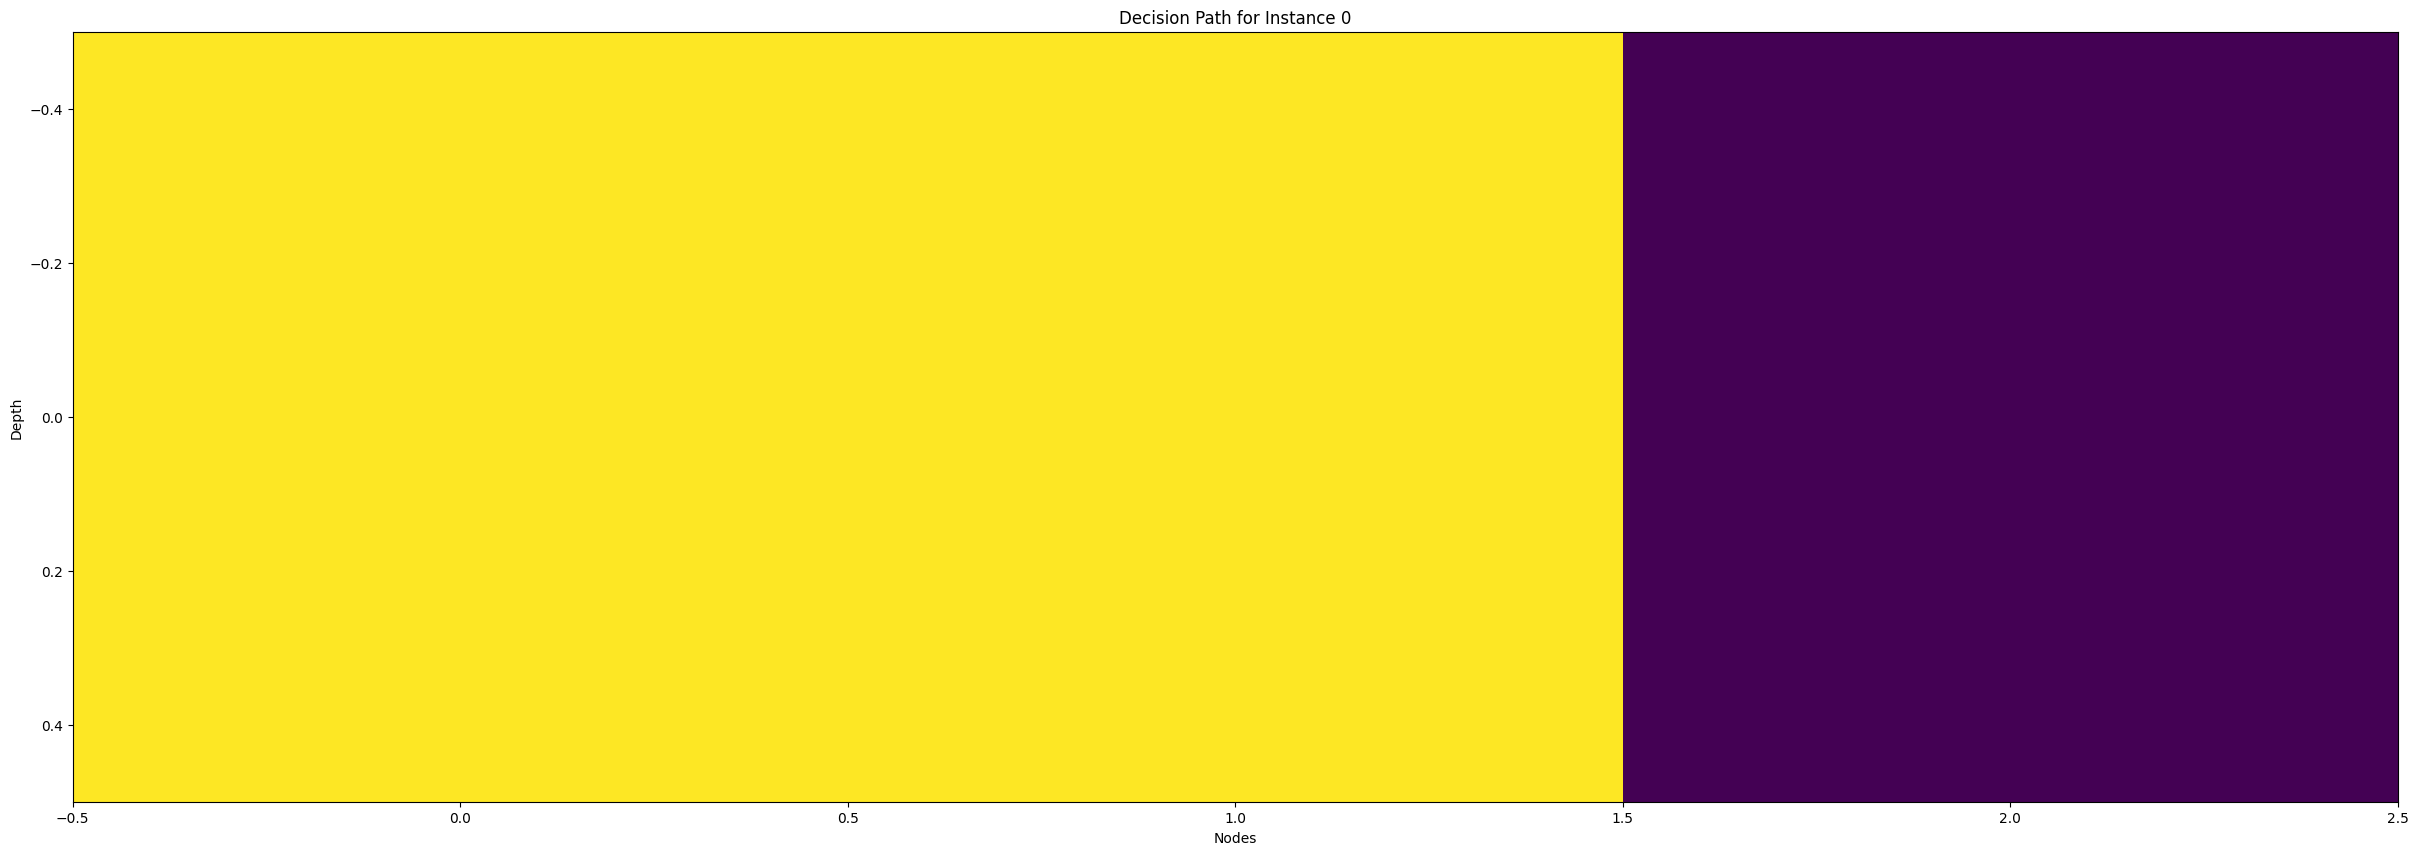

In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_text

instance_index = 0 
decision_path = regressor.decision_path(X.iloc[[instance_index]])

decision_path_array = decision_path.toarray()

tree_rules = export_text(regressor, feature_names=list(X.columns))
print(tree_rules)

plt.figure(figsize=(30, 10))
plt.imshow(decision_path_array, cmap='viridis', aspect='auto')
plt.title('Decision Path for Instance {}'.format(instance_index))
plt.xlabel('Nodes')
plt.ylabel('Depth')
plt.show()

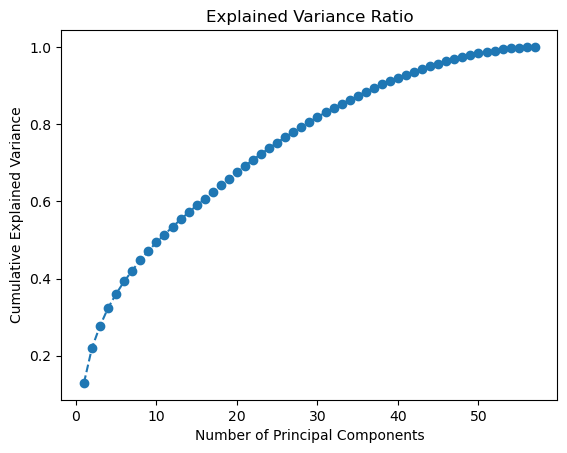

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.206404 -1.733256  0.790012 -0.287225  1.999337  2.101417 -1.198852   
1  1.653789  7.562667  2.206683  0.071179  4.157712 -0.382682  0.342816   
2  0.033382 -0.106209  1.370176 -0.672086  0.784544  0.774343 -0.556879   
3 -2.539000  0.349096  0.738014 -0.189003  0.424910 -0.781491 -0.198560   
4  2.929439  2.596239 -1.147211  0.318746 -1.155381  0.274474  0.454857   

        PC8       PC9      PC10  ...      PC37      PC38      PC39      PC40  \
0 -0.417267 -0.259157 -0.177296  ... -0.604439  1.927235  1.491362 -0.161653   
1 -1.770306 -0.618222 -0.569320  ... -0.170371 -2.038950  1.127072 -0.563082   
2 -0.725135  1.433098 -1.825811  ... -0.834252  0.074566  0.426832 -0.177766   
3 -0.723614  2.034085  0.144475  ... -0.957429  0.615838  0.430839  0.952075   
4  0.508671 -0.679832 -1.197155  ... -0.307918 -0.444790 -0.348057 -0.005201   

       PC41      PC42      PC43      PC44      PC45  ass_own  
0 -1.

In [56]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
target_variable = ['ass_own']
X = merged_22.drop(target_variable, axis=1)  
y = merged_22[target_variable]  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Access explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = explained_var_ratio.cumsum()
n_components_to_retain = (cumulative_var_ratio < 0.95).sum() + 1

# Visualize explained variance ratio
plt.plot(range(1, len(explained_var_ratio) + 1), cumulative_var_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

# Fit PCA again with the determined number of components
pca_final = PCA(n_components=n_components_to_retain)
X_pca_final = pca_final.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pc_columns = [f'PC{i}' for i in range(1, n_components_to_retain + 1)]
pc_df = pd.DataFrame(data=X_pca_final, columns=pc_columns)
result_df = pd.concat([pc_df, y.reset_index(drop=True)], axis=1)

# Print the final DataFrame with principal components and the target variable
print(result_df.head())


In [57]:
# Standardize the data
features = ['spo_h', 'wor_min', 'chi_num', 'tot_bal', 'hh_inc', 'ass_own']

x = merged_22.loc[:, features].values
x = StandardScaler().fit_transform(x)

# Perform PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(x)

#First principal component
loadings = pca.components_[0]

# Create a DataFrame to show the features and their loadings
loadings_df = pd.DataFrame({'Feature': features, 'Loading': loadings})
loadings_df = loadings_df.reindex(loadings_df['Loading'].abs().sort_values(ascending=False).index)

#Print
print("Top contributing features to the first principal component:")
print(loadings_df)

Top contributing features to the first principal component:
   Feature   Loading
5  ass_own  0.648993
4   hh_inc  0.640663
0    spo_h -0.304158
3  tot_bal -0.212447
2  chi_num  0.175195
1  wor_min  0.004398


In [58]:
# Standardize the data
features = ['spo_h', 'wor_min', 'chi_num', 'tot_bal', 'hh_inc']

x = merged_22.loc[:, features].values
x = StandardScaler().fit_transform(x)

# Perform PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(x)

#First principal component
loadings = pca.components_[1]

# Create a DataFrame to show the features and their loadings
loadings_df = pd.DataFrame({'Feature': features, 'Loading': loadings})
loadings_df = loadings_df.reindex(loadings_df['Loading'].abs().sort_values(ascending=False).index)

# Print
print("Top contributing features to the second principal component:")
print(loadings_df)

Top contributing features to the second principal component:
   Feature   Loading
2  chi_num -0.713193
3  tot_bal  0.487175
0    spo_h  0.370957
1  wor_min  0.310555
4   hh_inc -0.141289
